$\textit{k}$-nearest neightbors to detect outliers algorithm toy example - simple

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from __future__ import division

We first generate some random points in x-y plane, and some points that we are going to use as examples (red).

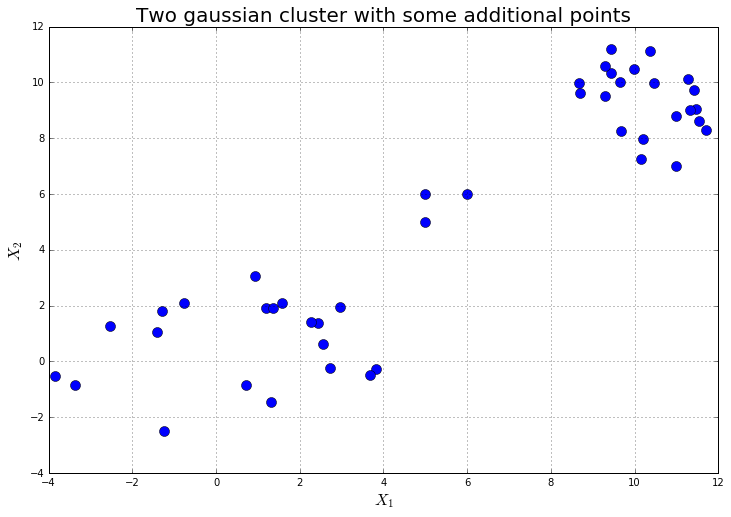

In [64]:
np.random.seed(1337)
cs = 20
x1 = np.random.multivariate_normal([10,10], [[1,0],[0,1]], cs)
x2 = np.random.multivariate_normal([1,1], [[5,0],[0,2]], cs)
x3 = [[11,7]]
x4 = [[5,6],[6,6],[5,5]]
X12 = np.concatenate((x1,x2), axis=0)
X = np.concatenate((X12, x3, x4), axis=0)

f1 = plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
ax1 = f1.add_subplot(111)
ax1.plot(*zip(*X12), marker='o', color='b', markersize=10, ls='')
ax1.plot(*zip(*x3), marker='o', color='b', markersize=10, ls='')
ax1.plot(*zip(*x4), marker='o', color='b', markersize=10, ls='')
ax1.grid(True)
ax1.set_xlabel('$X_1$', fontsize=16)
ax1.set_ylabel('$X_2$', fontsize=16)
ax1.set_title('Two gaussian cluster with some additional points', fontsize=20)

f3.savefig('figures/knn_lof_datapoints.pdf',bbox_inches='tight')

C:\Users\chris\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\chris\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


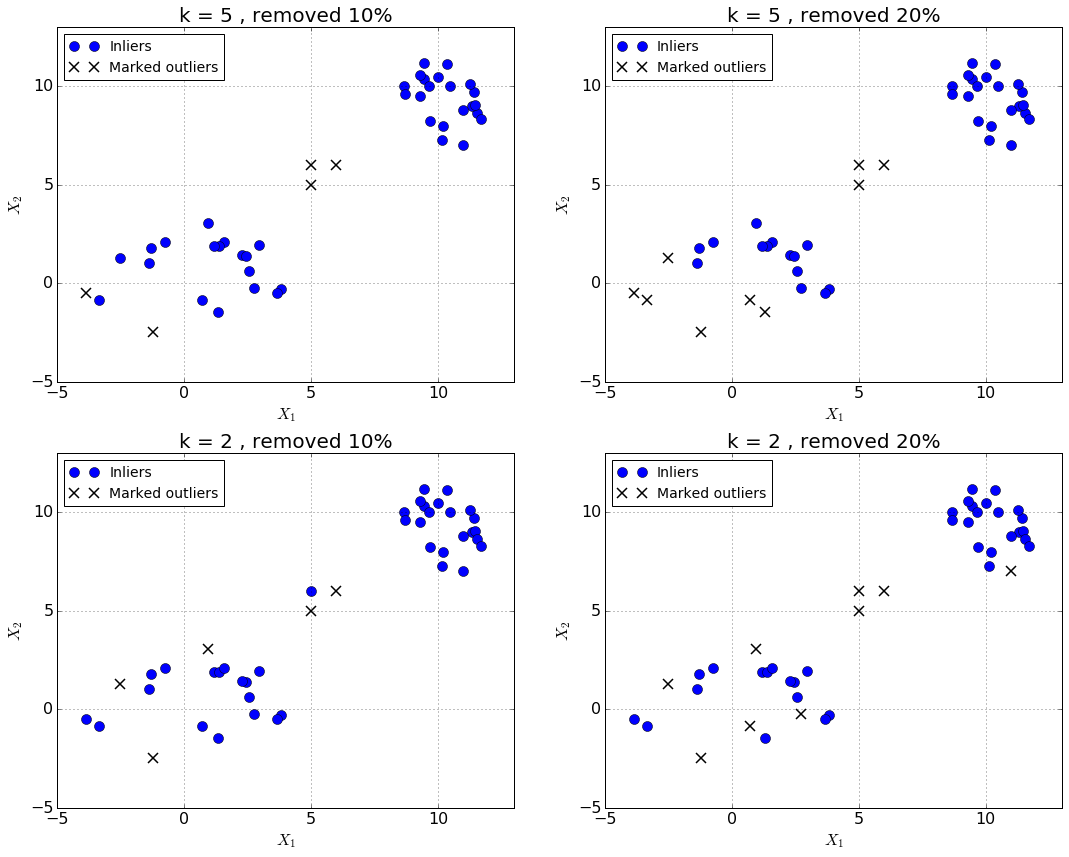

In [65]:
#knn function gets the dataset and calculates K-Nearest neighbors and distances
def knn(df,k):
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(df)
    distances, indices = nbrs.kneighbors(df)
    return distances, indices

#Plotting properties
ms = 10 #Markersize

f2 = plt.figure(figsize=(18,14), dpi=80, facecolor='w', edgecolor='k')
"""
Three cases:
1: k=5, threshold = 10% removed
2: k=5, threshold = 20% removed
3: k=2, threshold = 10% removed
4: k=2, threshold = 20% removed
"""
n = len(X)
ks = [5.0, 5.0, 2.0, 2.0] #Neighbors to compare
ths = [10.0, 20.0, 10.0, 20.0] #Percent to remove
subplots = [221, 222, 223, 224]

for i in np.arange(4):
    threshold = np.ceil((ths[i]/100)*n)
    k = ks[i]

    knndist, knnindices = knn(X,k)
    knnnorm = np.array([np.linalg.norm(j) for j in knndist])
    
    outmask = knnnorm.argsort()[-threshold:][::-1]
    inmask = knnnorm.argsort()[:len(knnnorm)-threshold]
    
    inliers = [X[j] for j in inmask]
    outliers = [X[j] for j in outmask]

    ax = f2.add_subplot(2, 2, i+1)
    ax.plot(*zip(*inliers), marker='o', color='b', markersize=ms, ls='', label='Inliers')
    ax.plot(*zip(*outliers), marker='x', markeredgewidth=1.5, color='k', markersize=ms, ls='', label='Marked outliers')
    ax.set_xlabel('$X_1$', fontsize=16)
    ax.set_ylabel('$X_2$', fontsize=16)
    ax.axis([-5,13,-5,13])
    ax.set_title('k = %d , removed %d%%' %(k, ths[i]), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(prop={'size':14}, markerscale=1, loc=2)
    ax.grid(True)

f3.savefig('figures/simple_knn_example.pdf',bbox_inches='tight')
